In [1]:
# !pip3 install altair

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import pickle
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Helper functions for wrangling

In [3]:
def gen_plot(plot):
  plot = plot.split(",")
  plot = {"x": plot[0].strip(), "y": plot[1].strip()}
  return [plot]

def gen_category(cat):
  cat = cat.split(',')
  return {
      "show": cat[0] == "yes",
      "column": cat[1]
  }

def gen_ground(ground):
  if type(ground) is type(0.0):
    ground = ""
  ground = ground.replace("]", "").replace("[", "")
  ground = [int(x.strip()) for x in ground.split(",") if x]
  return ground

def gen_center(cen):
  if type(cen) is type(0.0):
    cen = ""
  cen = [float(x) for x in cen.split(',') if x]
  if len(cen) == 2:
    return {'x': cen[0], 'y': cen[1]}
  return None

In [4]:
df = pd.read_csv("Data/Tasks.csv")

In [5]:
new_df = df.copy(deep=True)
new_df["plots"] = new_df["plots"].map(gen_plot)
new_df["category"] = new_df["showCategory"] + "," + new_df["categoryColumn"]
new_df['category'] = new_df['category'].map(gen_category)
new_df['ground'] = new_df['ground'].map(gen_ground)
new_df['reference'] = new_df['reference'].map(gen_ground)
new_df['center'] = new_df['center'].map(gen_center)

In [6]:
taskDf = new_df[new_df['type'] != "category"]
taskDf = taskDf[~taskDf['dataset'].isin(["out_easy_task_5", "out_med_task_5", "out_hard_task_5"])]
# taskDf = taskDf[(taskDf['training'] == 'yes' & taskDf['difficulty'] == "medium")]
taskDf = taskDf.query("(training == 'yes' & difficulty != 'medium') | training == 'no'")
taskDf.shape

(42, 15)

In [7]:
taskDf

,id,type,difficulty,manual,training,task,dataset,plots,showCategory,categoryColumn,ground,reference,center,symbol,category
0,0,cluster,easy,manual,yes,Select the points which belong to the cluster ...,cluster_easy_training_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[139, 49, 88, 93, 55, 128, 72, 66, 168, 43, 94...",[],"{'x': 3.13, 'y': 2.1}",NaN,"{'show': False, 'column': 'Cluster'}"
1,1,cluster,easy,manual,no,Select the points which belong to the cluster ...,cluster_easy_task_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[3, 4, 7, 10, 15, 18, 20, 22, 28, 31, 33, 35, ...",[],"{'x': 2.33, 'y': 2.47}",NaN,"{'show': False, 'column': 'Cluster'}"
2,2,cluster,easy,supported,no,Select the points which belong to the cluster ...,cluster_easy_task_2,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[3, 9, 14, 15, 16, 18, 19, 22, 23, 32, 43, 47,...",[],"{'x': 10.67, 'y': 17.5}",NaN,"{'show': False, 'column': 'Cluster'}"
4,4,cluster,medium,manual,no,Select the points which belong to the cluster ...,cluster_med_task_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[2, 4, 5, 6, 8, 11, 12, 14, 15, 16, 19, 20, 21...",[],"{'x': 15.07, 'y': 7.78}",NaN,"{'show': False, 'column': 'Cluster'}"
5,5,cluster,medium,supported,no,Select the points which belong to the cluster ...,cluster_med_task_2,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[0, 12, 14, 28, 36, 37, 39, 43, 47, 53, 54, 55...",[],"{'x': 4.58, 'y': 10.79}",NaN,"{'show': False, 'column': 'Cluster'}"
6,6,cluster,hard,supported,yes,Select the points which belong to the cluster ...,cluster_hard_training_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[192, 137, 163, 50, 183, 86, 85, 76, 175, 105,...",[],"{'x': 10.0, 'y': 9.53}",NaN,"{'show': False, 'column': 'Cluster'}"
7,7,cluster,hard,manual,no,Select the points which belong to the cluster ...,cluster_hard_task_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[0, 1, 4, 6, 9, 12, 14, 16, 21, 23, 26, 31, 33...",[],"{'x': 8.48, 'y': 19.12}",NaN,"{'show': False, 'column': 'Cluster'}"
8,8,cluster,hard,supported,no,Select the points which belong to the cluster ...,cluster_hard_task_2,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[9, 22, 25, 26, 28, 29, 31, 34, 37, 42, 46, 47...",[],"{'x': 22.25, 'y': 8.7}",NaN,"{'show': False, 'column': 'Cluster'}"
22,23,outlier,easy,manual,no,"Select the points that are outliers, i.e., tha...",out_easy_task_1,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[200, 201, 202, 203, 204]",[],None,NaN,"{'show': False, 'column': 'Cluster'}"
23,24,outlier,easy,manual,no,"Select the points that are outliers, i.e., tha...",out_easy_task_2,"[{'x': 'X', 'y': 'Y'}]",no,Cluster,"[200, 201, 202]",[],None,NaN,"{'show': False, 'column': 'Cluster'}"


In [8]:
import requests
def process_code(participantId, sessionId, studyId):
  url = f"https://us-central1-intent-system-prolific.cloudfunctions.net/api/provenance/{participantId}/{sessionId}/{studyId}"
  r = requests.get(url)
  data = json.loads(r.content)
  return data

In [9]:
import gzip
import json
import zlib

In [10]:
coderA = zlib.decompress(b'x\x9c\xf3p\xf4\xf4p\xf4\x03\x00\x05\xc7\x01\xaa').decode()
coderB = zlib.decompress(b'x\x9csv\x0c\xf2\xf7\xf1\xf4s\x04\x00\nF\x02J').decode()
coderD = zlib.decompress(b'x\x9c\xf3u\x8c\x00\x00\x01\xc4\x00\xe7').decode()
coderE = zlib.decompress(b'x\x9c\xf3rt\xf6\x06\x00\x02\xc0\x01\x1a').decode()
coderF = zlib.decompress(b'x\x9csq\r\xf3\xf4\x03\x00\x04O\x01w').decode()

In [11]:
print(coderA, coderB, coderD, coderE, coderF)

HAIHAN CAROLINA MAX JACK DEVIN


In [12]:
coder_a = process_code("CODING", coderA, "CD_1585114085388")

In [13]:
coder_b = process_code("CODE", coderB, "CD_1586290842282")

In [14]:
coder_d = process_code("CODE", coderD, "CD_1585491209339")

In [15]:
coder_e = process_code("CODE", coderE, "CD_1585354198471")

In [16]:
coder_f = process_code("CODE", coderF, "CD_1586287480125")

In [17]:
def get_code_for_task(taskId):
  codeDict = {}
  if taskId == '39':
    codeDict['coderA'] = []
  else:
    codeDict["coderA"] = coder_a[str(taskId)]
  if taskId == '42':
    codeDict["coderB"] = []
  else:
    codeDict["coderB"] = coder_b[str(taskId)]
  codeDict["coderF"] = coder_f[str(taskId)]
  codeDict["coderD"] = coder_d[str(taskId)]
  codeDict["coderE"] = coder_e[str(taskId)]
  return codeDict

In [18]:
def plot(data, name, ground=[], x="X", y="Y", color="Matches"):
  data['isGround'] = "No"
  ground = [i for i in ground if i < data.shape[0]]
  data.loc[ground, ['isGround']] = "Yes"
  return alt.Chart(data).mark_point().encode(
      x=f"{x}:Q",
      y=f"{y}:Q",
      color=alt.Color(f"{color}:N", scale=alt.Scale(domain=[0,1,2,3,4,5]), legend=alt.Legend(labelFontSize=20, titleFontSize=22)),
  ).properties(title=name)


In [19]:
from collections import Counter

refDict = {}

for index,row in taskDf.iterrows():
  taskId = row['id']
  dataset = row['dataset']
  taskType = row['type']
  ground = row['ground']
  training = row['training']
  if training == 'no':
    continue
  if taskType == "category":
    continue

  
  data = pd.read_csv(f"Data/datasets/{dataset}.csv")
  
  shape = data.shape
  codes = get_code_for_task(taskId)
  allList = []
  for code in codes:
    idxs = codes[code]
    allList.extend(idxs)
  count = Counter(allList)
  validCount = dict(filter(lambda x: x[1] > 3, count.items()))
  refDict[dataset] = list(validCount.keys())

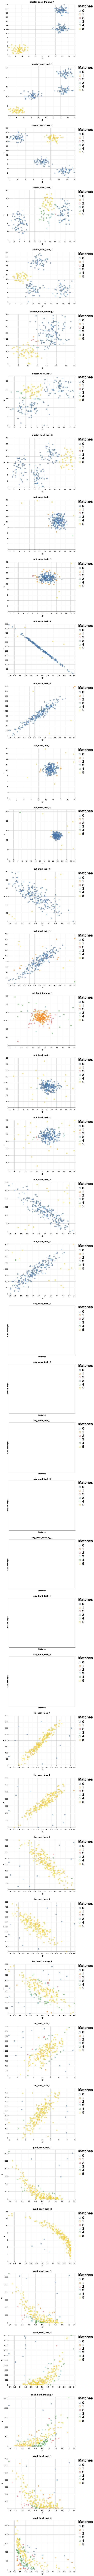

In [20]:
plots = []

codeDict = {}

for index,row in taskDf.iterrows():
  taskId = row['id']
  dataset = row['dataset']
  taskType = row['type']
  ground = row['ground']
  if taskType == "category":
    continue
  codes = get_code_for_task(taskId)
  data = pd.read_csv(f"Data/datasets/{dataset}.csv")
  data['Matches'] = 0
  for code in codes:
    idxs = codes[code]
    try:
      data.loc[idxs, [ 'Matches']] += 1
    except:
      idxs = [i for i in idxs if i < data.shape[0]]
      data.loc[idxs, [ 'Matches']] += 1
  if 'sky' in dataset:
    plots.append(plot(data, name=dataset, x="Distance", y="Cost Per Night"))
  else:
    plots.append(plot(data, name=dataset, ground=ground))
  codeDict[taskId] = data['Matches'].tolist()

alt.vconcat(*plots).resolve_scale(color='independent', shape='independent')

In [21]:
with open("Data/codeDict.pickle", 'wb') as pick:
  pickle.dump(codeDict, pick, protocol=pickle.HIGHEST_PROTOCOL)